<a href="https://colab.research.google.com/github/davidf22/Foodwastemanagement/blob/main/foodwaste1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [ ]:

df = pd.read_csv("food_wastage_data.csv")
selected_columns = df[['Type of Food', 'Number of Guests', 'Quantity of Food', 'Wastage Food Amount']]



In [ ]:
selected_columns = ['Type of Food', 'Number of Guests', 'Quantity of Food', 'Wastage Food Amount']

# Step 2: Verify that the columns exist in the DataFrame
print("Columns in DataFrame:", df.columns.tolist())
print("Selected columns:", selected_columns)

# Step 3: Select only those columns, ensuring your DataFrame contains only the selected columns
try:
    df2 = df[selected_columns]
    print("Selected columns DataFrame:")
    print(df2)
except KeyError as e:
    print(f"Error: {e}. Check that all column names are correct.")

# Step 4: Check data types in the DataFrame
print("\nData types in the DataFrame:")
print(df.dtypes)


Columns in DataFrame: ['Type of Food', 'Number of Guests', 'Event Type', 'Quantity of Food', 'Storage Conditions', 'Purchase History', 'Seasonality', 'Preparation Method', 'Geographical Location', 'Pricing', 'Wastage Food Amount']
Selected columns: ['Type of Food', 'Number of Guests', 'Quantity of Food', 'Wastage Food Amount']
Selected columns DataFrame:
     Type of Food  Number of Guests  Quantity of Food  Wastage Food Amount
0              01               310               450                    0
1              01               400               500                    1
2              02               302               371                    1
3              01               491               497                    1
4              01               300               400                    0
...           ...               ...               ...                  ...
1777           04               310               350                    1
1778           04               284        

In [ ]:
df2.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,0.500561
std,67.829658,65.204674,0.500140
min,207.000000,280.000000,0.000000
25%,267.000000,350.000000,0.000000
50%,302.000000,400.000000,1.000000
75%,350.000000,480.000000,1.000000
max,491.000000,500.000000,1.000000


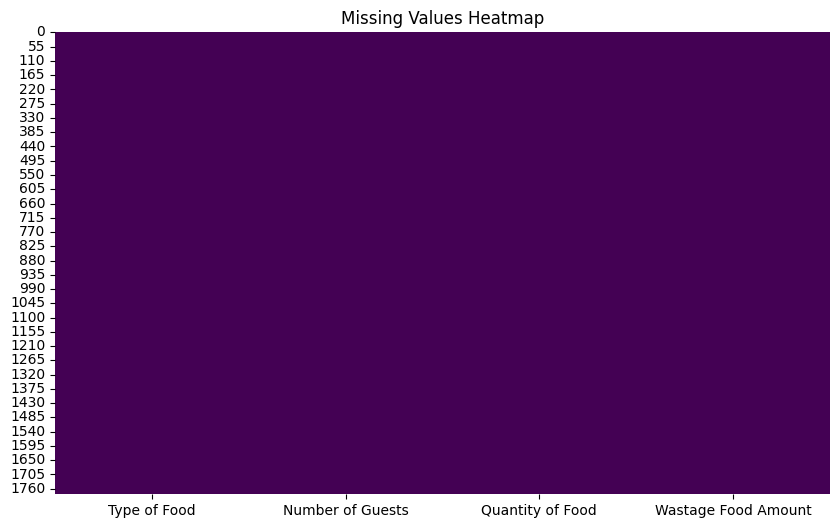

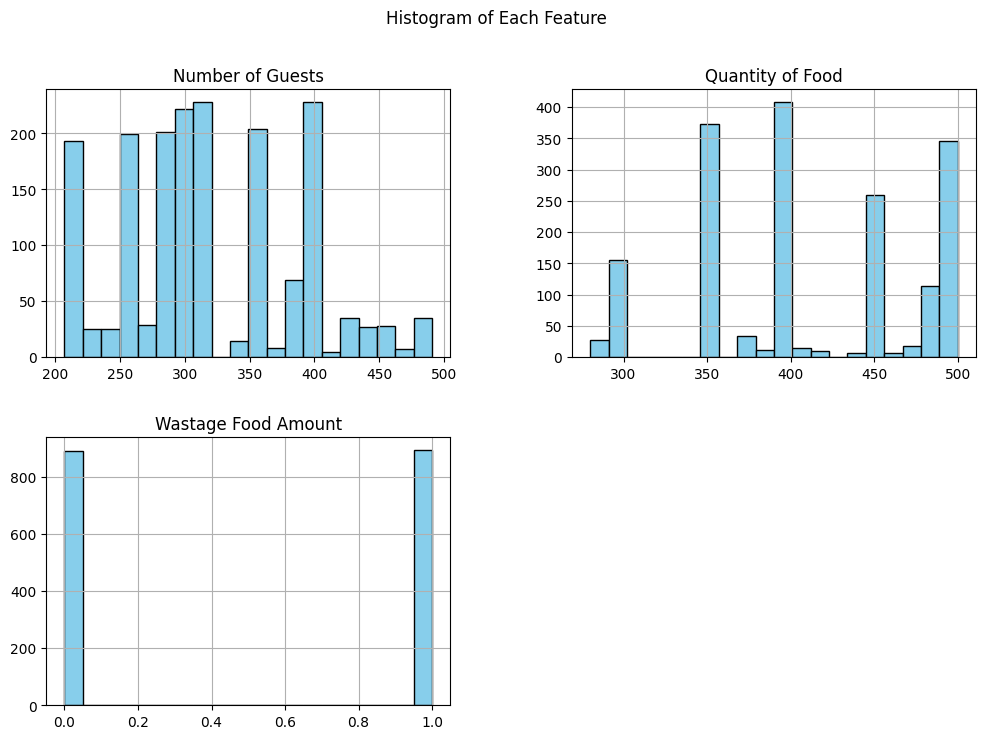

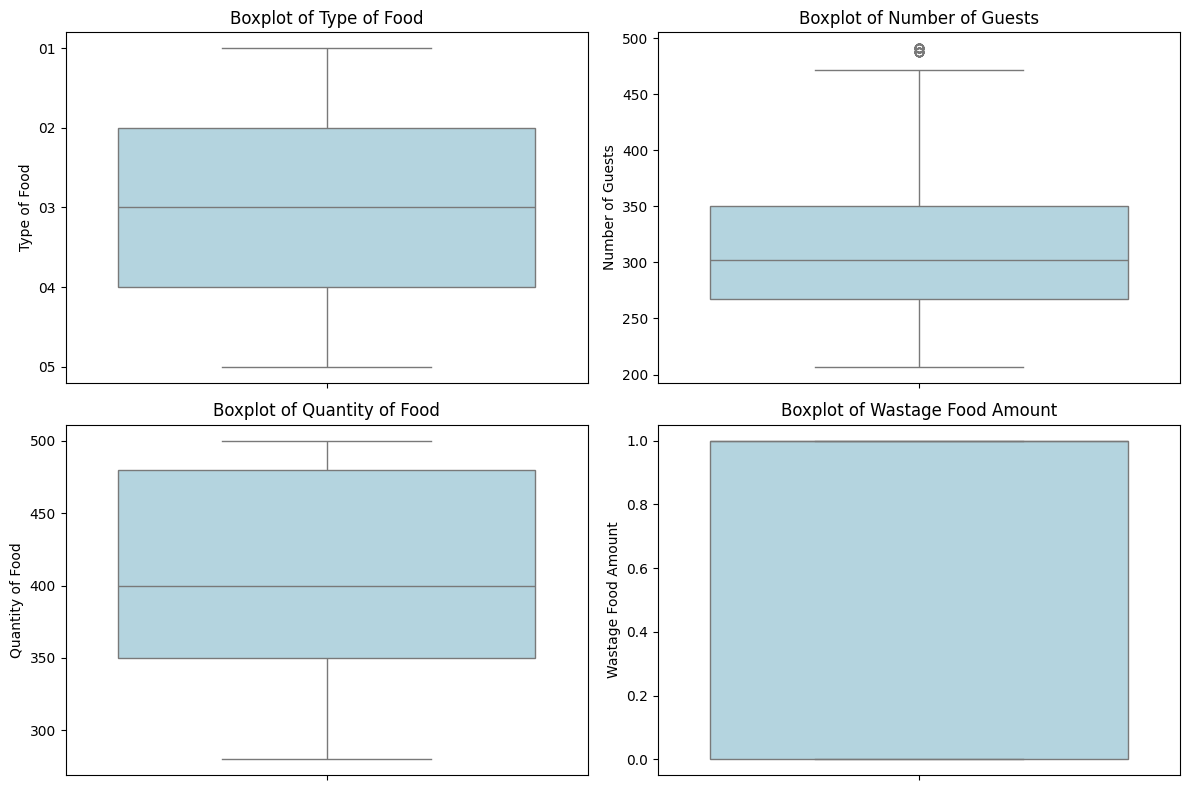

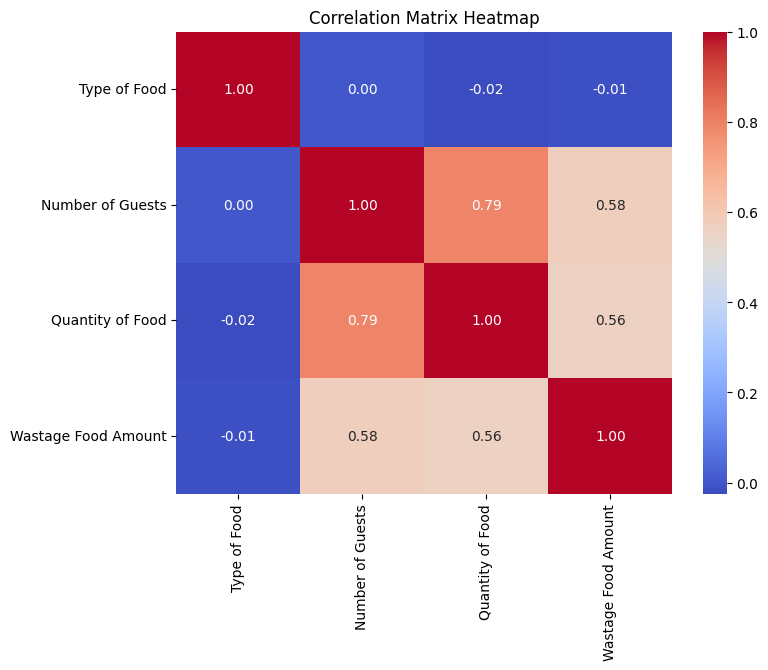

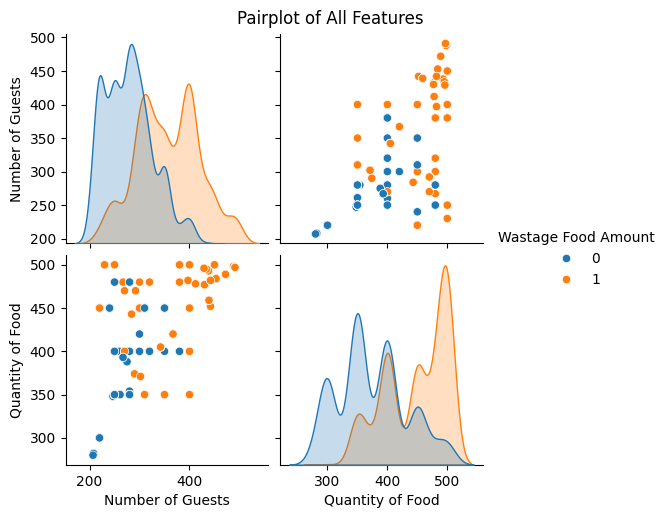

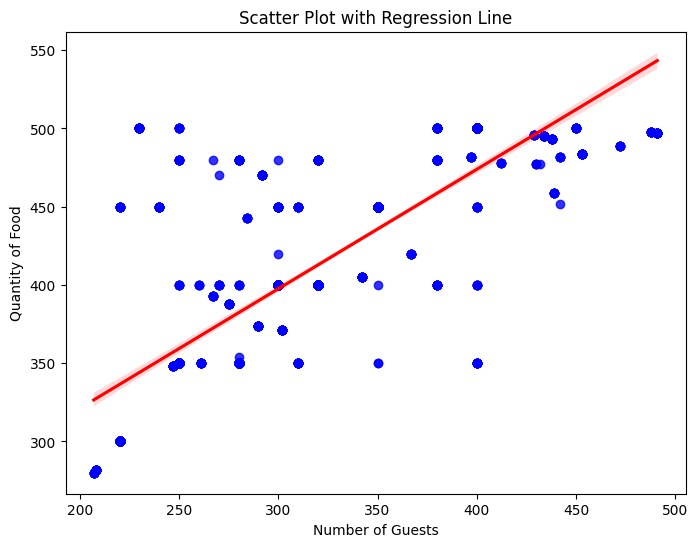

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 2: Univariate Analysis - Plot histograms for each column
df2.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Each Feature')
plt.show()

# Step 3: Boxplots to detect outliers in each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(df2.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df2[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 4: Correlation matrix and heatmap
corr_matrix = df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 5: Pairplot to explore relationships between variables
sns.pairplot(df2, hue = "Wastage Food Amount")
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()

# Step 6: Scatter plot with a regression line for bivariate analysis
# Example: Scatter plot between 'Number of Guests' and 'Quantity of Food'
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Guests', y='Quantity of Food', data=df2, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line')
plt.show()

In [ ]:

print(df.head())


  Type of Food  Number of Guests Event Type  Quantity of Food  \
0           01               310  Corporate               450   
1           01               400   Birthday               500   
2           02               302   Birthday               371   
3           01               491   Birthday               497   
4           01               300  Corporate               400   

  Storage Conditions Purchase History  Seasonality Preparation Method  \
0       Refrigerated          Regular  All Seasons             Buffet   
1   Room Temperature          Regular       Winter             Buffet   
2       Refrigerated          Regular       Summer             Buffet   
3       Refrigerated          Regular  All Seasons        Finger Food   
4       Refrigerated          Regular       Winter        Finger Food   

  Geographical Location   Pricing  Wastage Food Amount  
0                 Urban       Low                    0  
1              Suburban      High                    1  

In [ ]:
df['Type of Food'].unique()

array(['01', '02', '03', '04', '05'], dtype=object)

In [ ]:
food_mapping = {
    'Meat': '01',
    'Vegetables': '02',
    'Fruits': '03',
    'Baked Goods': '04',
    'Dairy Products': '05'
}

# Replace the 'Type of Food' column with the mapped values
df['Type of Food'] = df['Type of Food'].replace(food_mapping)

In [ ]:
df['Wastage Food Amount'] = df['Wastage Food Amount'].apply(lambda x: 0 if x <= 25 else 1)

In [ ]:
print(df.head())


  Type of Food  Number of Guests Event Type  Quantity of Food  \
0           01               310  Corporate               450   
1           01               400   Birthday               500   
2           02               302   Birthday               371   
3           01               491   Birthday               497   
4           01               300  Corporate               400   

  Storage Conditions Purchase History  Seasonality Preparation Method  \
0       Refrigerated          Regular  All Seasons             Buffet   
1   Room Temperature          Regular       Winter             Buffet   
2       Refrigerated          Regular       Summer             Buffet   
3       Refrigerated          Regular  All Seasons        Finger Food   
4       Refrigerated          Regular       Winter        Finger Food   

  Geographical Location   Pricing  Wastage Food Amount  
0                 Urban       Low                    0  
1              Suburban      High                    1  

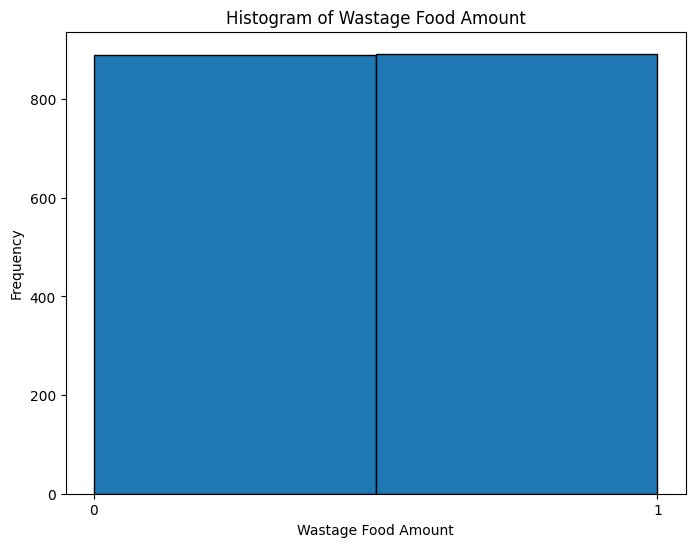

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Wastage Food Amount'], bins=2, edgecolor='black')
plt.xlabel('Wastage Food Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Wastage Food Amount')
plt.xticks([0, 1])
plt.show()

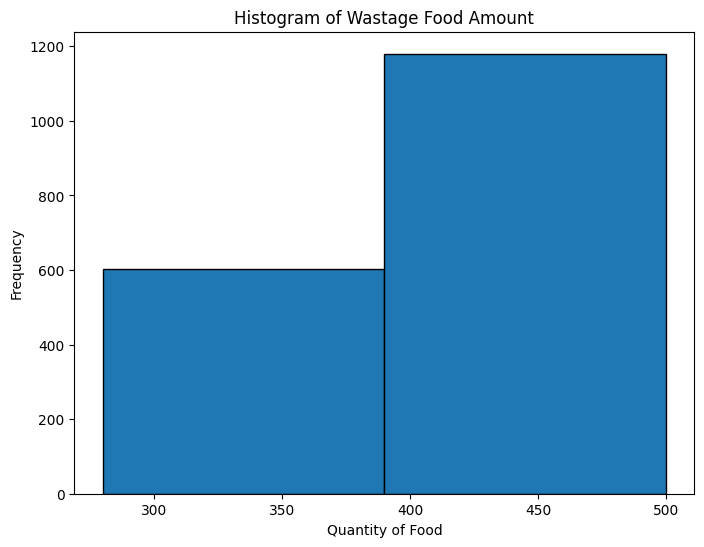

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Quantity of Food'], bins=2, edgecolor='black')
plt.xlabel('Quantity of Food')
plt.ylabel('Frequency')
plt.title('Histogram of Wastage Food Amount')
plt.show()

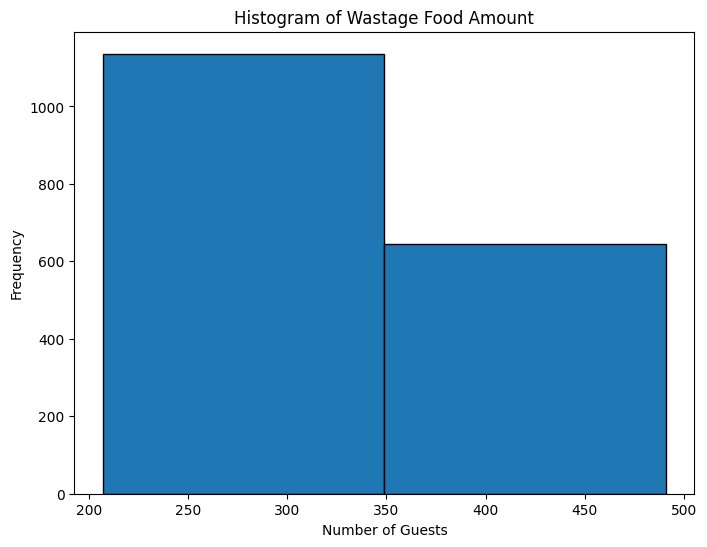

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Number of Guests'], bins=2, edgecolor='black')
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.title('Histogram of Wastage Food Amount')
plt.show()

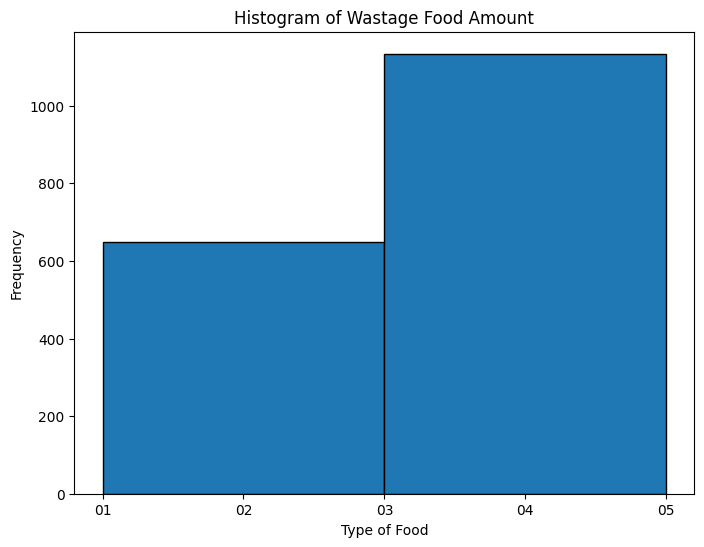

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Type of Food'], bins=2, edgecolor='black')
plt.xlabel('Type of Food')
plt.ylabel('Frequency')
plt.title('Histogram of Wastage Food Amount')
plt.show()

In [ ]:
x = df[['Type of Food', 'Number of Guests', 'Quantity of Food']]
y = df['Wastage Food Amount']

train validation and test

In [ ]:
train, valid, test = np.split(df2.sample(frac=1),[int(0.6*len(df2)),int(0.8*len(df2))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(df2, oversample=False):

  x = df2[df2.columns[:-1]].values
  y = df2[df2.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y




In [ ]:
train,x_train, y_train=scale_dataset(train,oversample=True)
valid,x_valid, y_valid=scale_dataset(valid,oversample=False)
test,x_test, y_test=scale_dataset(test,oversample=False)


naive bayes

In [ ]:
from sklearn.naive_bayes import  BernoulliNB
from sklearn.metrics import classification_report

In [ ]:
nb_model =  BernoulliNB()
nb_model= nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       192
           1       0.69      0.85      0.76       165

    accuracy                           0.76       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.77      0.76      0.76       357



In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
all_reg.score(x_test,y_test)

0.32354798420832953

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model =  RandomForestClassifier()
rf_model= rf_model.fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       192
           1       0.73      0.80      0.76       165

    accuracy                           0.77       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.77      0.77      0.77       357

